In [1]:
import pandas as pd
import os

path = "./Sales_data"
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_months_data = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(os.path.join(path, file))

    all_months_data = pd.concat([all_months_data, df_temp])

all_months_data.to_csv("all_data.csv", index=False)
df = pd.read_csv("all_data.csv")
print("All files merged successfully!")
print(df.head())

All files merged successfully!
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [3]:
print("--- Before Cleaning NaNs ---")
print(df.isnull().sum())

# Drop all rows where EVERY column is NaN
df = df.dropna(how='all')

print("\n--- After Cleaning NaNs ---")
print(df.isnull().sum())

# This line keeps only the rows where the 'Order Date' is NOT 'Order Date'
df = df[df['Order Date'].str[0:2] != 'Or']

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
print("\n--- Final Data Types ---")
df.info()

--- Before Cleaning NaNs ---
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

--- After Cleaning NaNs ---
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_16060\150382524.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])



--- Final Data Types ---
<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [4]:
# --- 1. Add 'Sales' Column ---
# Hum 'Quantity Ordered' aur 'Price Each' (jo ab numbers hain) ko multiply karke total sales nikaal sakte hain.
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df['Month'] = df['Order Date'].dt.month
def get_city(address):
    return address.split(',')[1].strip() # 'Dallas' nikaalega

def get_state(address):
    return address.split(',')[2].strip().split(' ')[0] # 'TX' nikaaleg

# Ab hum in functions ko .apply() se har row par chalaenge:
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Hum yeh janna chahte hain ki kis ghante (hour) mein sabse zyada sales hoti hai.
df['Hour'] = df['Order Date'].dt.hour

# Ab humare DataFrame mein 4 naye columns hone chahiye.
print("Successfully added new columns!")
print(df.head())

Successfully added new columns!
  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address   Sales  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.90      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   99.99      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.00      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   11.99      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   11.99      4   

               City  Hour  
0       Dallas (TX)     8  
2       Bo

--- Total Sales per Month ---
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


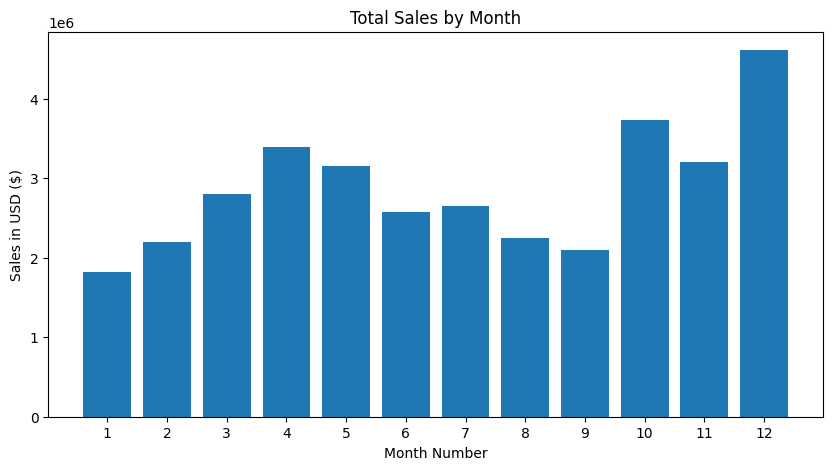

In [6]:
import matplotlib.pyplot as plt

# Hum 'Month' column se group karenge aur 'Sales' column ko sum() karenge.
monthly_sales = df.groupby('Month').sum(numeric_only=True)['Sales']
print("--- Total Sales per Month ---")
print(monthly_sales)

# Hum 1 se 12 tak ke months ki list banaenge
months = range(1, 13)

plt.figure(figsize=(10, 5))
plt.bar(months, monthly_sales)


plt.xticks(months) 
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.title('Total Sales by Month')
plt.show()

--- Total Sales per City ---
City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64


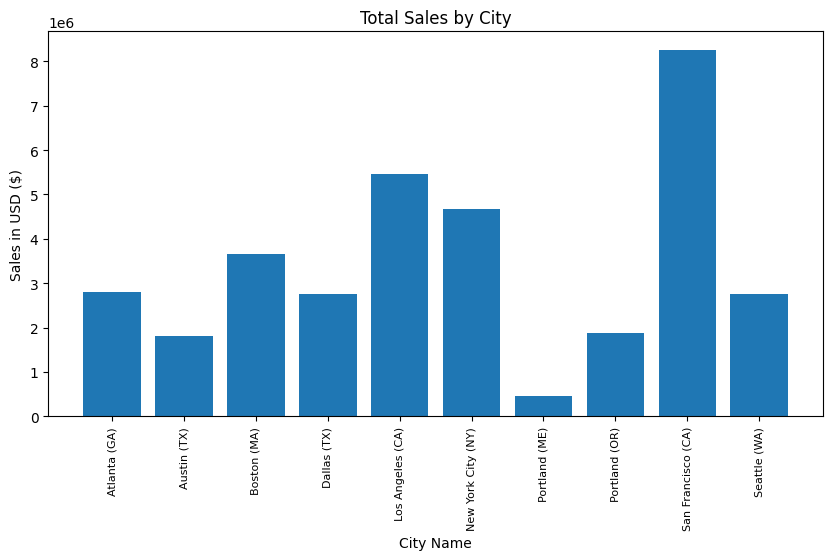

In [7]:
city_sales = df.groupby('City').sum(numeric_only=True)['Sales']
print("--- Total Sales per City ---")
print(city_sales)

cities = city_sales.index

plt.figure(figsize=(10, 5))
plt.bar(cities, city_sales)

plt.xticks(cities, rotation='vertical', size=8) # Sheheron ke naam vertical rotate karenge taaki overlap na hon
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.title('Total Sales by City')


plt.show()

--- Total Orders per Hour ---
Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64


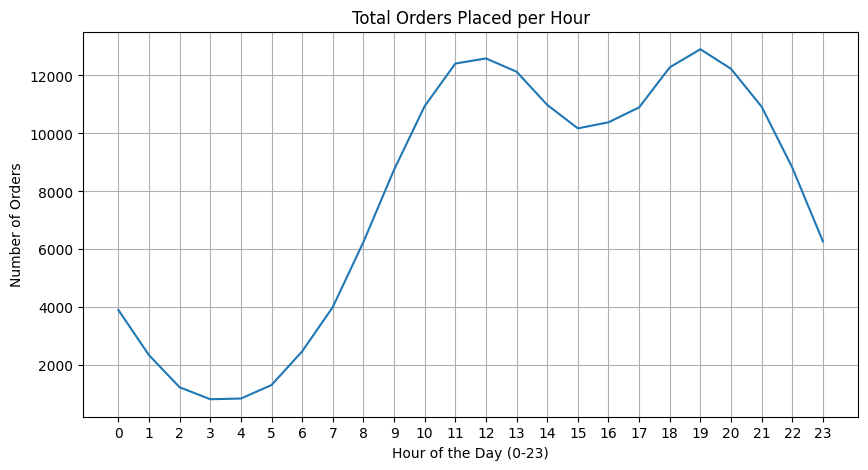

In [8]:
hourly_orders = df.groupby('Hour').count()['Order ID']
# Hum 'Order ID' (ya koi bhi column) ko count kar sakte hain.

print("--- Total Orders per Hour ---")
print(hourly_orders)

# Ek line chart is data ke liye sabse best hota hai.
hours = hourly_orders.index 
plt.figure(figsize=(10, 5))
plt.plot(hours, hourly_orders) 

# Add labels to the chart
plt.xticks(hours)
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Orders')
plt.title('Total Orders Placed per Hour')
plt.grid() 

plt.show()

--- Total Quantity Sold per Product ---
Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


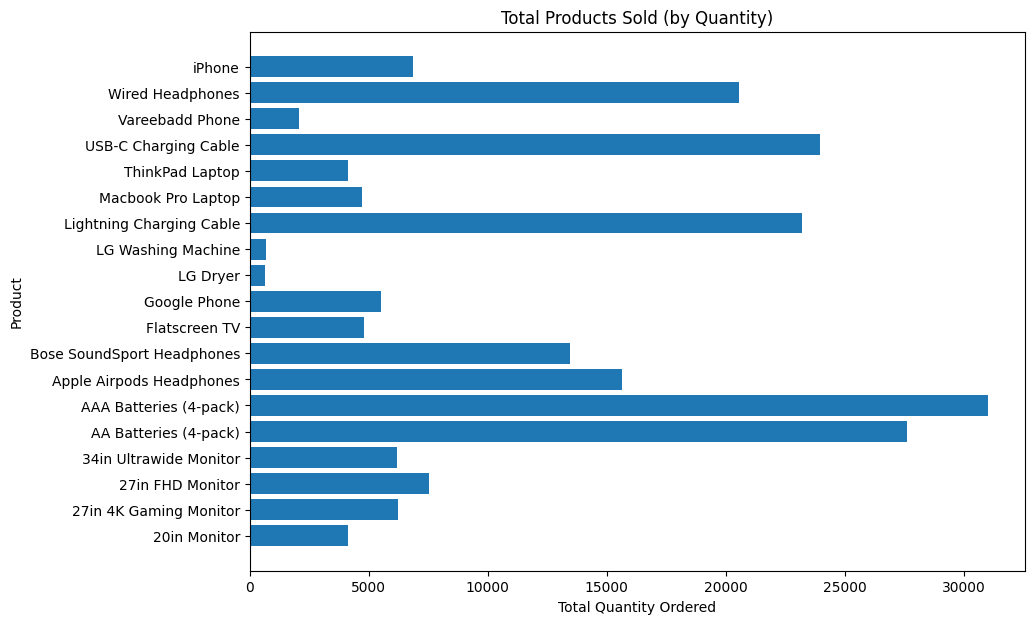

In [9]:
product_group = df.groupby('Product').sum(numeric_only=True)['Quantity Ordered']

print("--- Total Quantity Sold per Product ---")
print(product_group)


products = product_group.index    # Product names
quantity = product_group.values # Total quantity

plt.figure(figsize=(10, 7)) 
plt.barh(products, quantity) 

# Add labels to the chart
plt.ylabel('Product')
plt.xlabel('Total Quantity Ordered')
plt.title('Total Products Sold (by Quantity)')

plt.show()